# CD73-Positive Cell Spheroid Transplantation Attenuates Colonic Atrophy

**Functional analysis of gene signatures**


In [6]:
cd /mnt/storage/$USER/jupyternotebooks/task1

In [7]:
pwd

/mnt/storage/r0769656/jupyternotebooks/task1


In [8]:
mkdir functional_analysis_gene_signatures

In [9]:
ls

alignment                fastp
Assignment1_part1.ipynb  fastp_report
Assignment1_part2.ipynb  fastqc_test
Assignment1_part3.ipynb  fastq_files
counts                   functional_analysis_gene_signatures
deseq.results.csv        gencode.v26.primary_assembly.annotation.gtf


In [10]:
cd /mnt/storage/$USER/jupyternotebooks/task1/functional_analysis_gene_signatures/

In [11]:
pwd

/mnt/storage/r0769656/jupyternotebooks/task1/functional_analysis_gene_signatures


In [31]:
ln -sf /mnt/storage/r0769656/jupyternotebooks/task1/deseq.results.csv .
ln -sf /mnt/storage/r0769656/jupyternotebooks/task1/LFC_sorted_deseq.results.csv .

In [32]:
ls

deseq.results.csv  LFC_sorted_deseq.results.csv


I manually edited the header : "Gene","baseMean","log2FoldChange","lfcSE","stat","pvalue","padj"

In [33]:
head deseq.results.csv

Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
MTND2P28,419.742828459706,0.00228651359629848,0.0398465530994732,0.0574361226543502,0.954197788766711,0.999881422291181
MTCO1P12,42.9062494678833,0.120032185067143,0.142517591013933,0.845010982762261,0.398104707058476,0.999881422291181
MTATP6P1,1700.66435271233,0.0568370863814313,0.152839836496378,0.372066801147295,0.709843113575753,0.999881422291181
RP11-206L10.9,8.10796271835619,0.0274295315573092,0.0726951307802023,0.381223678583868,0.703037280428072,0.999881422291181
RP11-206L10.8,7.61700924131884,0.000330621265418249,0.0680982349552677,0.00486467312453384,0.996118567729632,0.999881422291181
FAM87B,346.040383041714,0.111241200428455,0.151348405165288,0.736601087546612,0.461364973409795,0.999881422291181
LINC01128,312.598368263358,0.0155585906305579,0.128653688197792,0.120967953612859,0.90371641806499,0.999881422291181
LINC00115,24.6202837494949,-0.00177944400501007,0.120216913127651,-0.014799694734945,0.988191983121519,0.999881422

In [34]:
head LFC_sorted_deseq.results.csv

Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
C1RL,686.811422316469,-0.522053434841461,0.16644886503251,-3.1603579164171,0.00157575438434582,0.999881422291181
SLC39A7,1855.87641280076,-0.418068513702588,0.164973459637571,-2.5380165697895,0.0111482705995855,0.999881422291181
CTSZ,153.59925616601,-0.405563506816299,0.165368165604042,-2.4644529953547,0.0137222560776824,0.999881422291181
ATOH8,288.420401170029,-0.345333823155409,0.161857560169728,-2.14956741169648,0.0315894484692106,0.999881422291181
BAX,2090.4984873551,-0.341351290232865,0.164668187942136,-2.07493788448812,0.0379922920008001,0.999881422291181
FADS2,1651.01463993974,-0.335667897682295,0.164405264922568,-2.05257708142706,0.040113612202511,0.999881422291181
CKAP2L,252.200412425851,-0.327486767050399,0.166865984064763,-1.96643424099505,0.0492484713952296,0.999881422291181
RAD23B,479.997465227455,-0.320093321746405,0.165785436956601,-1.93249072735019,0.0532989654558658,0.999881422291181
PATL1,128.344148794738,-0.29937215

In [35]:
head -1 deseq.results.csv
grep -n SMAD4 deseq.results.csv
grep -n S100A13 deseq.results.csv
grep -n FBXO22 deseq.results.csv
grep -n SLC3A2 deseq.results.csv

Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
12755:SMAD4,1286.27640755428,0.00952721653860179,0.161843817538317,0.0588663795109368,0.953058536858034,0.999881422291181
992:S100A13,1618.41137477492,0.130694803015221,0.166880656220288,0.783435857506693,0.433371206389682,0.999881422291181
10856:FBXO22,1252.97890261677,-0.00496046292379833,0.166922270766448,-0.0297167927235123,0.976292919179529,0.999881422291181
8395:SLC3A2,9096.49864956892,0.0837428775973097,0.16437777175096,0.509483209201464,0.610413564734664,0.999881422291181


The log fold change values do not indicate any upregulation. 

Strong up-regulation -> (logFC > 2) and p.adj << 0.05

## Creating lists of up and down regulated genes

Checking for undetected expression in the log2FC column 

In [36]:
awk -F, '$3 != "NA" && $3 > 1 && $7 < 0.05 {print ;}' deseq.results.csv | head

The above command resulted in no significantly upregulated genes. Therefore I will just look at the genes with 100 highest log2FC values.

In [40]:
tail LFC_sorted_deseq.results.csv -n 100 | awk -F, '{print $1, $3}'

POSTN 0.21261925155148
MAX 0.212870944346869
PYGL 0.212939688122319
VKORC1 0.212944906233827
APBB1IP 0.213045535273115
EGR1 0.213184161216174
RP11-736K20.5 0.213200580546664
RP11-234A1.1 0.214645452315106
TGFB3 0.21493150821324
CBFB 0.215188009533378
REXO1 0.21526170430907
PITHD1 0.215291532260966
LINC01605 0.21537175113751
DNPH1 0.217016172938718
LRP1 0.217169676082837
CCDC115 0.217769044490824
SNHG14 0.218087312338874
ALKBH5 0.21842717383813
SCPEP1 0.21867817000531
QTRT1 0.218875034659166
IL17D 0.219079234317862
OSER1-AS1 0.219764928442127
INAFM2 0.22027046610488
DUSP6 0.220545956076314
CEBPZOS 0.221949979100625
NFIL3 0.224216009304622
PKIA 0.225129770304064
AFDN 0.225938785506449
MARCKSL1 0.226661172510924
BCL7C 0.227081344167794
PLAU 0.227876605658407
ZNF300 0.22808212023237
COPS8 0.228123062607506
MCM4 0.228840803911857
CARNMT1 0.228897583973266
CHD9 0.228935417834798
SLFN11 0.229830994568902
AF127936.9 0.229848707435336
ANGPT2 0.232603741294726
MCUB 0.232709873248254
SLC5A3 0.232

None of the log2FC are above 2 and therefore were not found to be significant. 

Writing the gene names to a file

In [41]:
tail LFC_sorted_deseq.results.csv -n 100 | awk -F, '{print $1}' > up-logFC1.txt

Now for the downregulated genes:

In [42]:
head LFC_sorted_deseq.results.csv -n 100 | awk -F, '{print $1, $3}'

Gene log2FoldChange
C1RL -0.522053434841461
SLC39A7 -0.418068513702588
CTSZ -0.405563506816299
ATOH8 -0.345333823155409
BAX -0.341351290232865
FADS2 -0.335667897682295
CKAP2L -0.327486767050399
RAD23B -0.320093321746405
PATL1 -0.299372153000687
SV2A -0.295416615367
CARMN -0.294647571294788
TRIM14 -0.294543269807338
MMP19 -0.294057207615522
TBC1D9 -0.293920338378878
TPM1 -0.28956070458107
CTF1 -0.286470528769884
LRRC15 -0.285259382104235
NUAK2 -0.283987217343112
KIFC1 -0.274847427038795
CDC42 -0.274619546000237
HNRNPK -0.272003573797131
PTGIR -0.258628025191607
SLC16A7 -0.256185445487659
FUNDC1 -0.254359399418068
KIAA1524 -0.250995285604732
LDLR -0.250026278201811
AJUBA -0.248275979183988
CLCN4 -0.246914430301682
HN1L -0.246302943074944
SEMA4C -0.246179246503188
CECR1 -0.245349678915331
UCP2 -0.243266772088919
U2AF2 -0.242860496897399
DHCR7 -0.241437602062251
PODNL1 -0.240178242201099
LTBP1 -0.239125898589134
STX17 -0.237501240862898
IL18BP -0.236029758747763
HACD4 -0.235177337010724
GI

Again, none of the values are smaller than -2.

In [43]:
head LFC_sorted_deseq.results.csv -n 100 | awk -F, '{print $1}' > down-logFC1.txt

In [44]:
wc -l up-logFC1.txt
wc -l down-logFC1.txt

100 up-logFC1.txt
100 down-logFC1.txt


## Analysis of up-regulated genes

### Humanmine.org

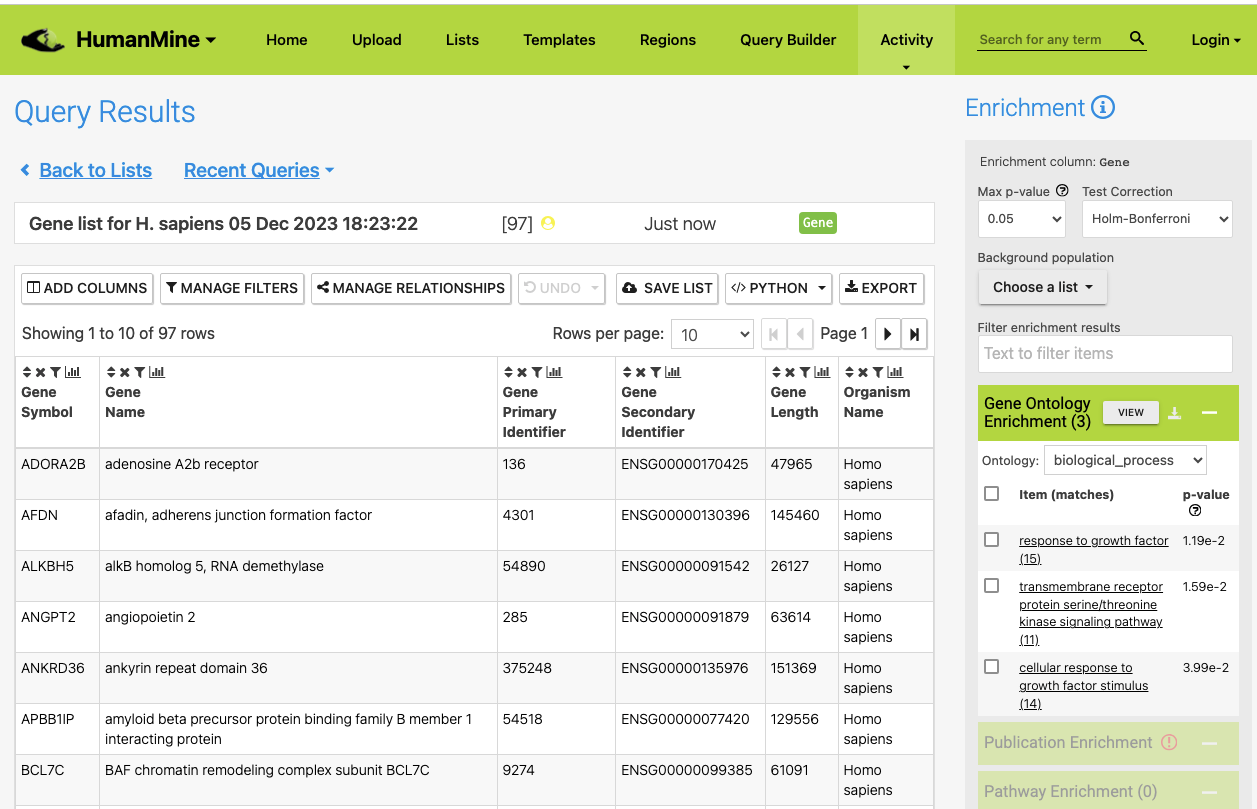

### gProfiler

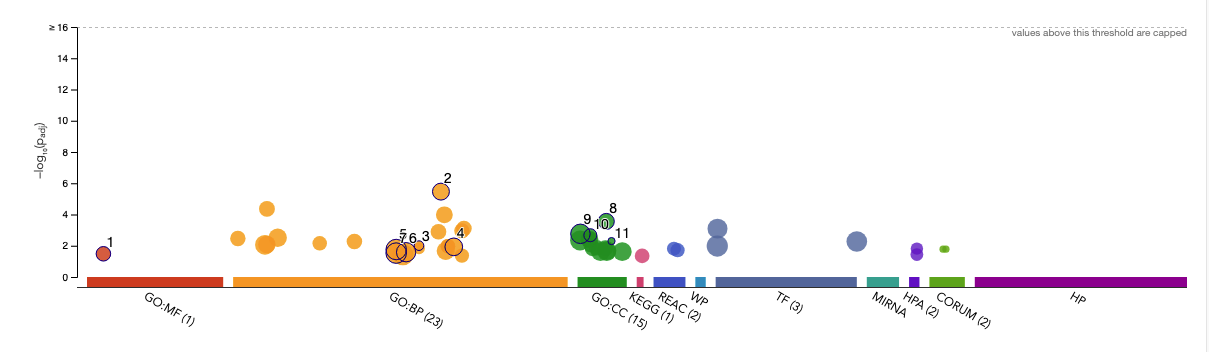

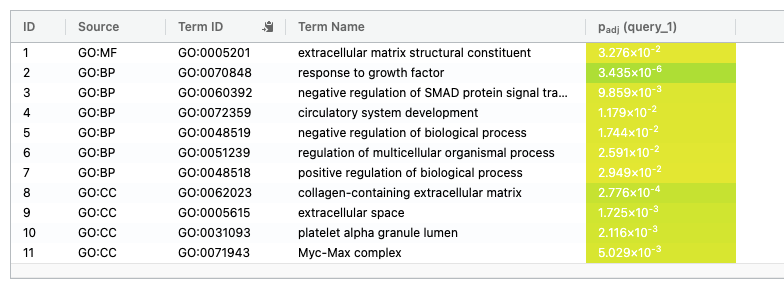

The above GO terms do not correspond exactly to the GO terms that the authors in the paper found. This may be because they were able to identify genes with significant log2FC and adjusted p values, whereas these were not found here:
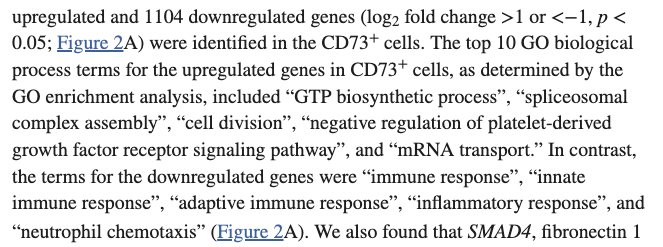

However, the up-regulated genes that were found here are related to cell profilation and the extracellular matrix, which is what was also found by the authors using gene set enrichment analysis (GSEA): 
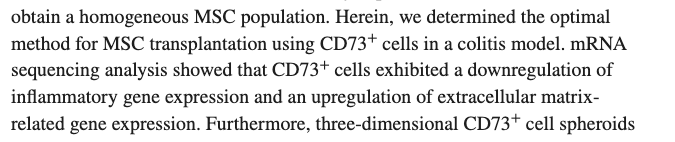

## Analysis of down-regulated genes

### Humanmine.org

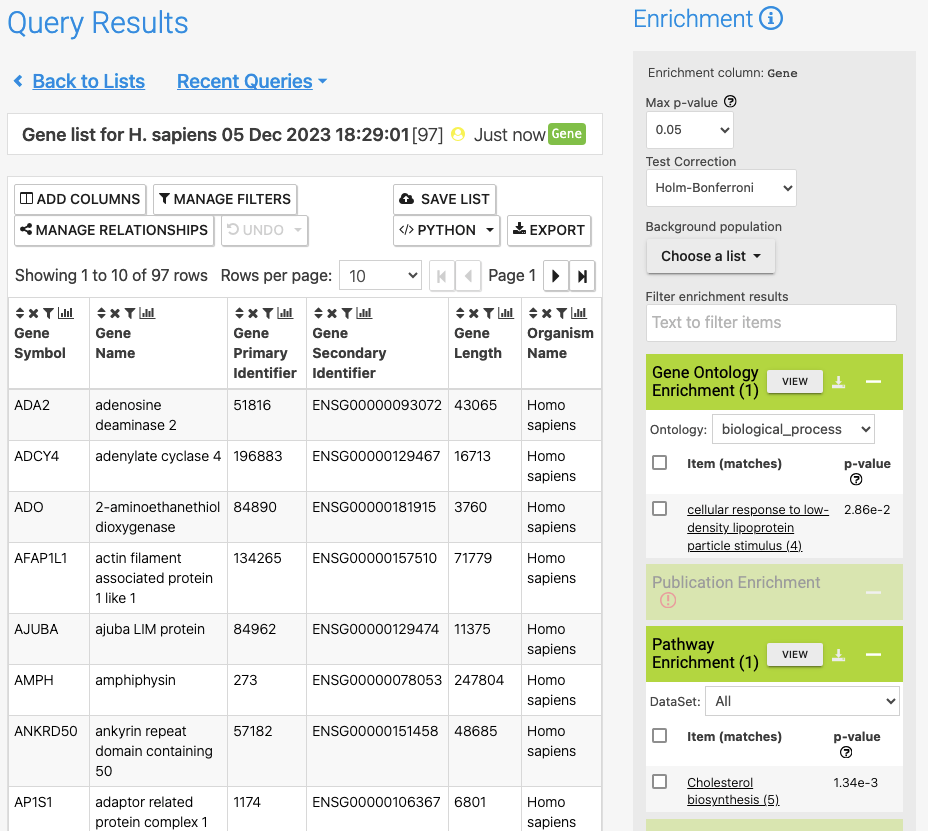

### gProfiler

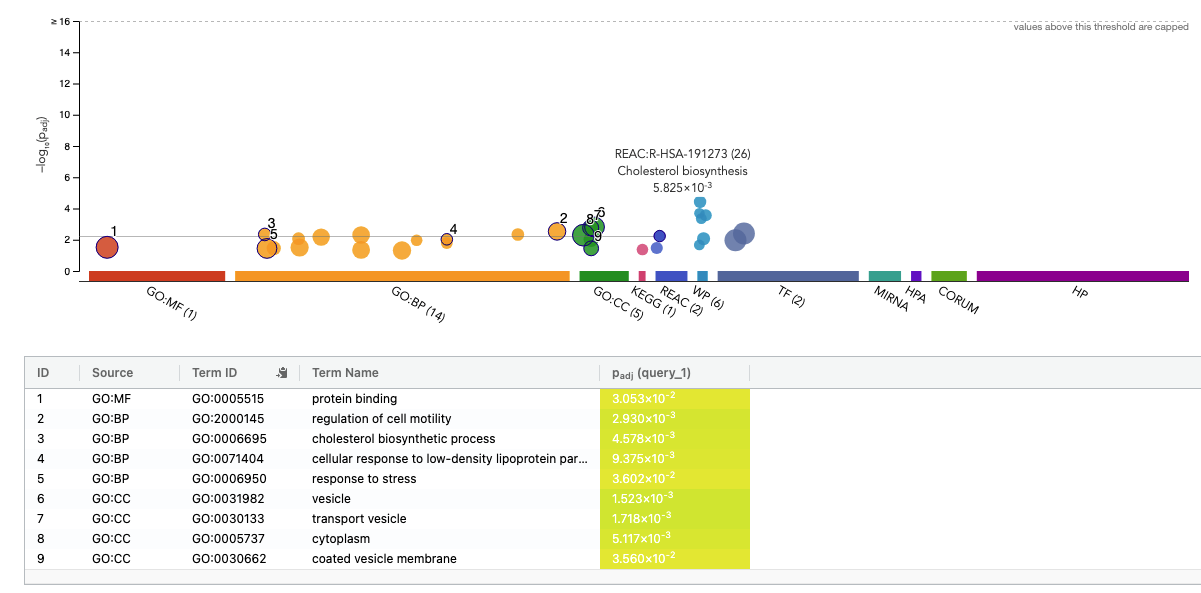

Since these cells were taken from adipose tissues, it is not surprising that the genes related to cholesterol biosynthesis are mentioned, though there would be no reason for these to be down-regulated. It was also expected that genes that are involved in the immune response would be down-regulated, however this was not observed. 

## Use the entire ranking to determine the "leading edge"

### GORilla

Sort all genes descending by their log2FC or padj; here we use log2FC

In [47]:
cat deseq.results.csv | sort -t, -k3,3gr | awk -F, '$3 != "NA" {print $1}' | grep -v Gene | head

MT-ND6
ZNF542P
CHI3L2
HES1
CHRDL1
XPNPEP2
ADORA2B
CGREF1
MT-ND5
MEDAG
grep: write error: Broken pipe
sort: write failed: 'standard output': Broken pipe
sort: write error


In [48]:
cat deseq.results.csv | sort -t, -k3,3gr | awk -F, '$3 != "NA" {print $1}' | grep -v Gene > deseq.results.sortFCdesc.txt

In [49]:
wc -l deseq.results.sortFCdesc.txt

15311 deseq.results.sortFCdesc.txt


In [50]:
wc -l LFC_sorted_deseq.results.csv

15312 LFC_sorted_deseq.results.csv


The file length is correct (the header was removed in `deseq.results.sortFCdesc.txt`)

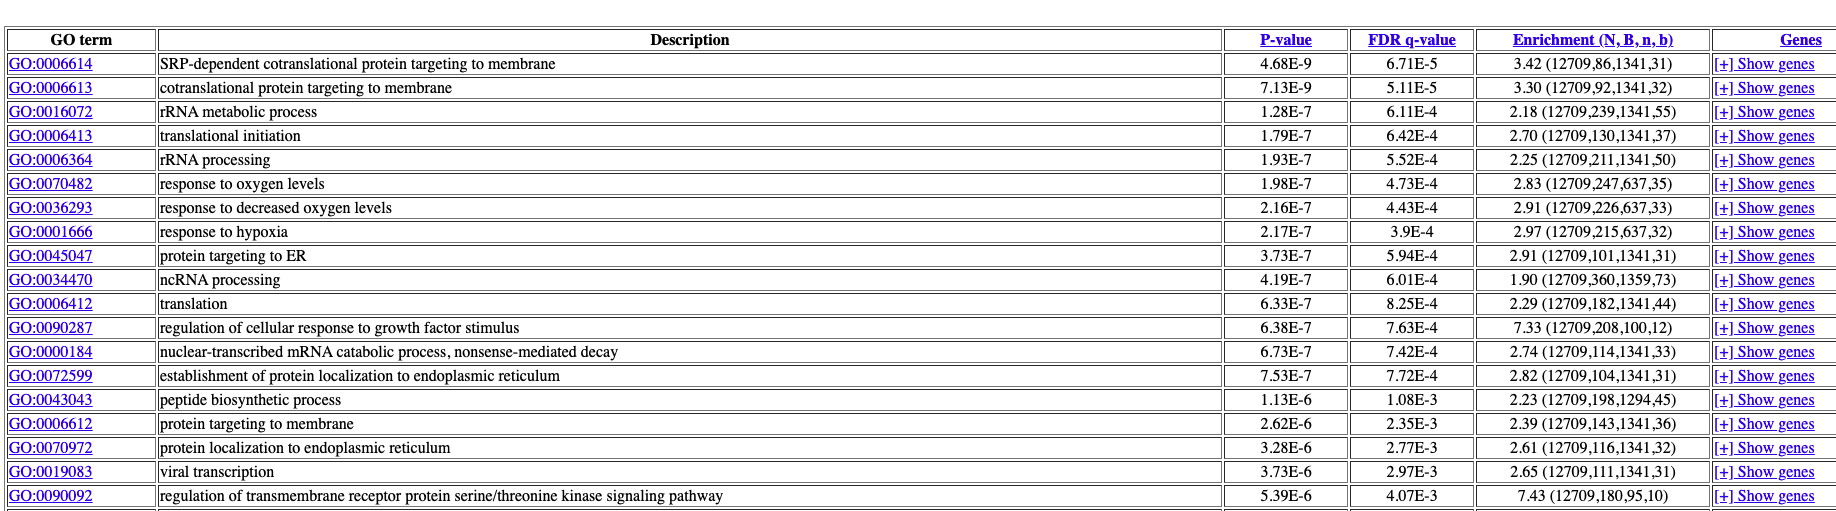

Again, there are a lot of GO terms that are related to cell profilation and protein synthesis. It is also worth noting that there are some GO terms that are related to oxygen deprivation, which may indicate that the cells were starved of oxygen and the growth conditions were not ideal. 

The enrichment levels are quite high for most of the gene sets. For example for the top gene set, the expected enrichment proportion is 86/12709, whereas the observed based on the current samples is 31/1341. 

For the down-regulated genes -> the same but now the list in ascending order:

In [55]:
cat deseq.results.csv | sort -t, -k3,3g | awk -F, '$3 != "NA" {print $1}' | grep -v Gene > deseq.results.sortFCasc.txt

In [56]:
wc -l deseq.results.sortFCasc.txt

15311 deseq.results.sortFCasc.txt


In [57]:
head deseq.results.sortFCasc.txt

C1RL
SLC39A7
CTSZ
ATOH8
BAX
FADS2
CKAP2L
RAD23B
PATL1
SV2A


In [54]:
head LFC_sorted_deseq.results.csv

Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
C1RL,686.811422316469,-0.522053434841461,0.16644886503251,-3.1603579164171,0.00157575438434582,0.999881422291181
SLC39A7,1855.87641280076,-0.418068513702588,0.164973459637571,-2.5380165697895,0.0111482705995855,0.999881422291181
CTSZ,153.59925616601,-0.405563506816299,0.165368165604042,-2.4644529953547,0.0137222560776824,0.999881422291181
ATOH8,288.420401170029,-0.345333823155409,0.161857560169728,-2.14956741169648,0.0315894484692106,0.999881422291181
BAX,2090.4984873551,-0.341351290232865,0.164668187942136,-2.07493788448812,0.0379922920008001,0.999881422291181
FADS2,1651.01463993974,-0.335667897682295,0.164405264922568,-2.05257708142706,0.040113612202511,0.999881422291181
CKAP2L,252.200412425851,-0.327486767050399,0.166865984064763,-1.96643424099505,0.0492484713952296,0.999881422291181
RAD23B,479.997465227455,-0.320093321746405,0.165785436956601,-1.93249072735019,0.0532989654558658,0.999881422291181
PATL1,128.344148794738,-0.29937215

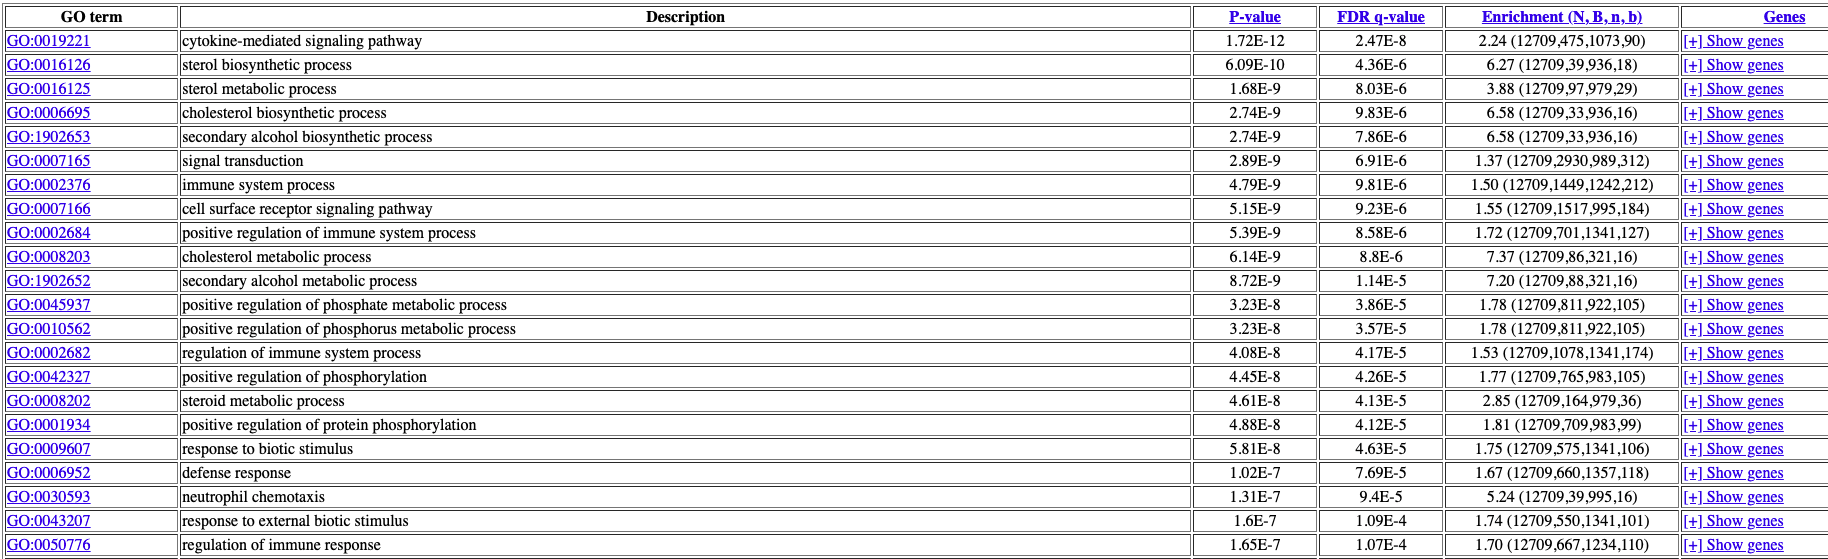

Some of the down-regulated genes are related to the immune response, which is also something that that the authors of the paper saw. Therefore, there is evidence that the immune response in CD73+ cells was downregulated. 

### GSEA : Gene Set Enrichment Analysis

In [58]:
cat deseq.results.csv | sort -t, -k3,3gr | awk -F, '$3 != "NA" {print $1, $3}' | grep -v Gene | head

MT-ND6 0.891051389817491
ZNF542P 0.695247152797732
CHI3L2 0.470374528465763
HES1 0.446278446104801
CHRDL1 0.419287957113536
XPNPEP2 0.403370148383969
ADORA2B 0.40257015009477
CGREF1 0.376180492367974
MT-ND5 0.374810777763135
MEDAG 0.369782760467036
grep: write error: Broken pipe
sort: write failed: 'standard output': Broken pipe
sort: write error


In [59]:
cat deseq.results.csv | sort -t, -k3,3gr | awk -F, '$3 != "NA" {print $1 "," $3}' | grep -v Gene | tr ',' '\t' > deseq.logFC.rnk

In [60]:
head deseq.logFC.rnk

MT-ND6	0.891051389817491
ZNF542P	0.695247152797732
CHI3L2	0.470374528465763
HES1	0.446278446104801
CHRDL1	0.419287957113536
XPNPEP2	0.403370148383969
ADORA2B	0.40257015009477
CGREF1	0.376180492367974
MT-ND5	0.374810777763135
MEDAG	0.369782760467036


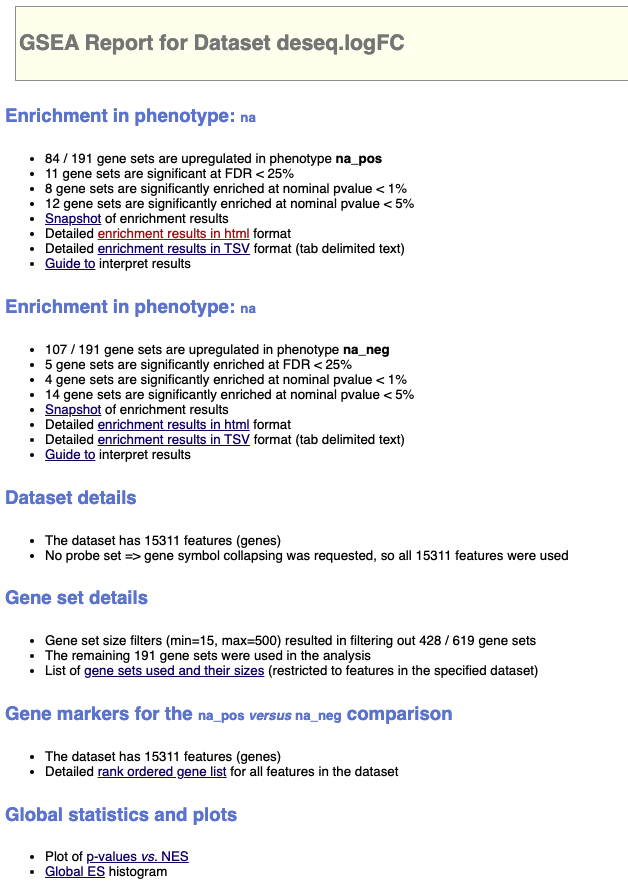

For upregulated:
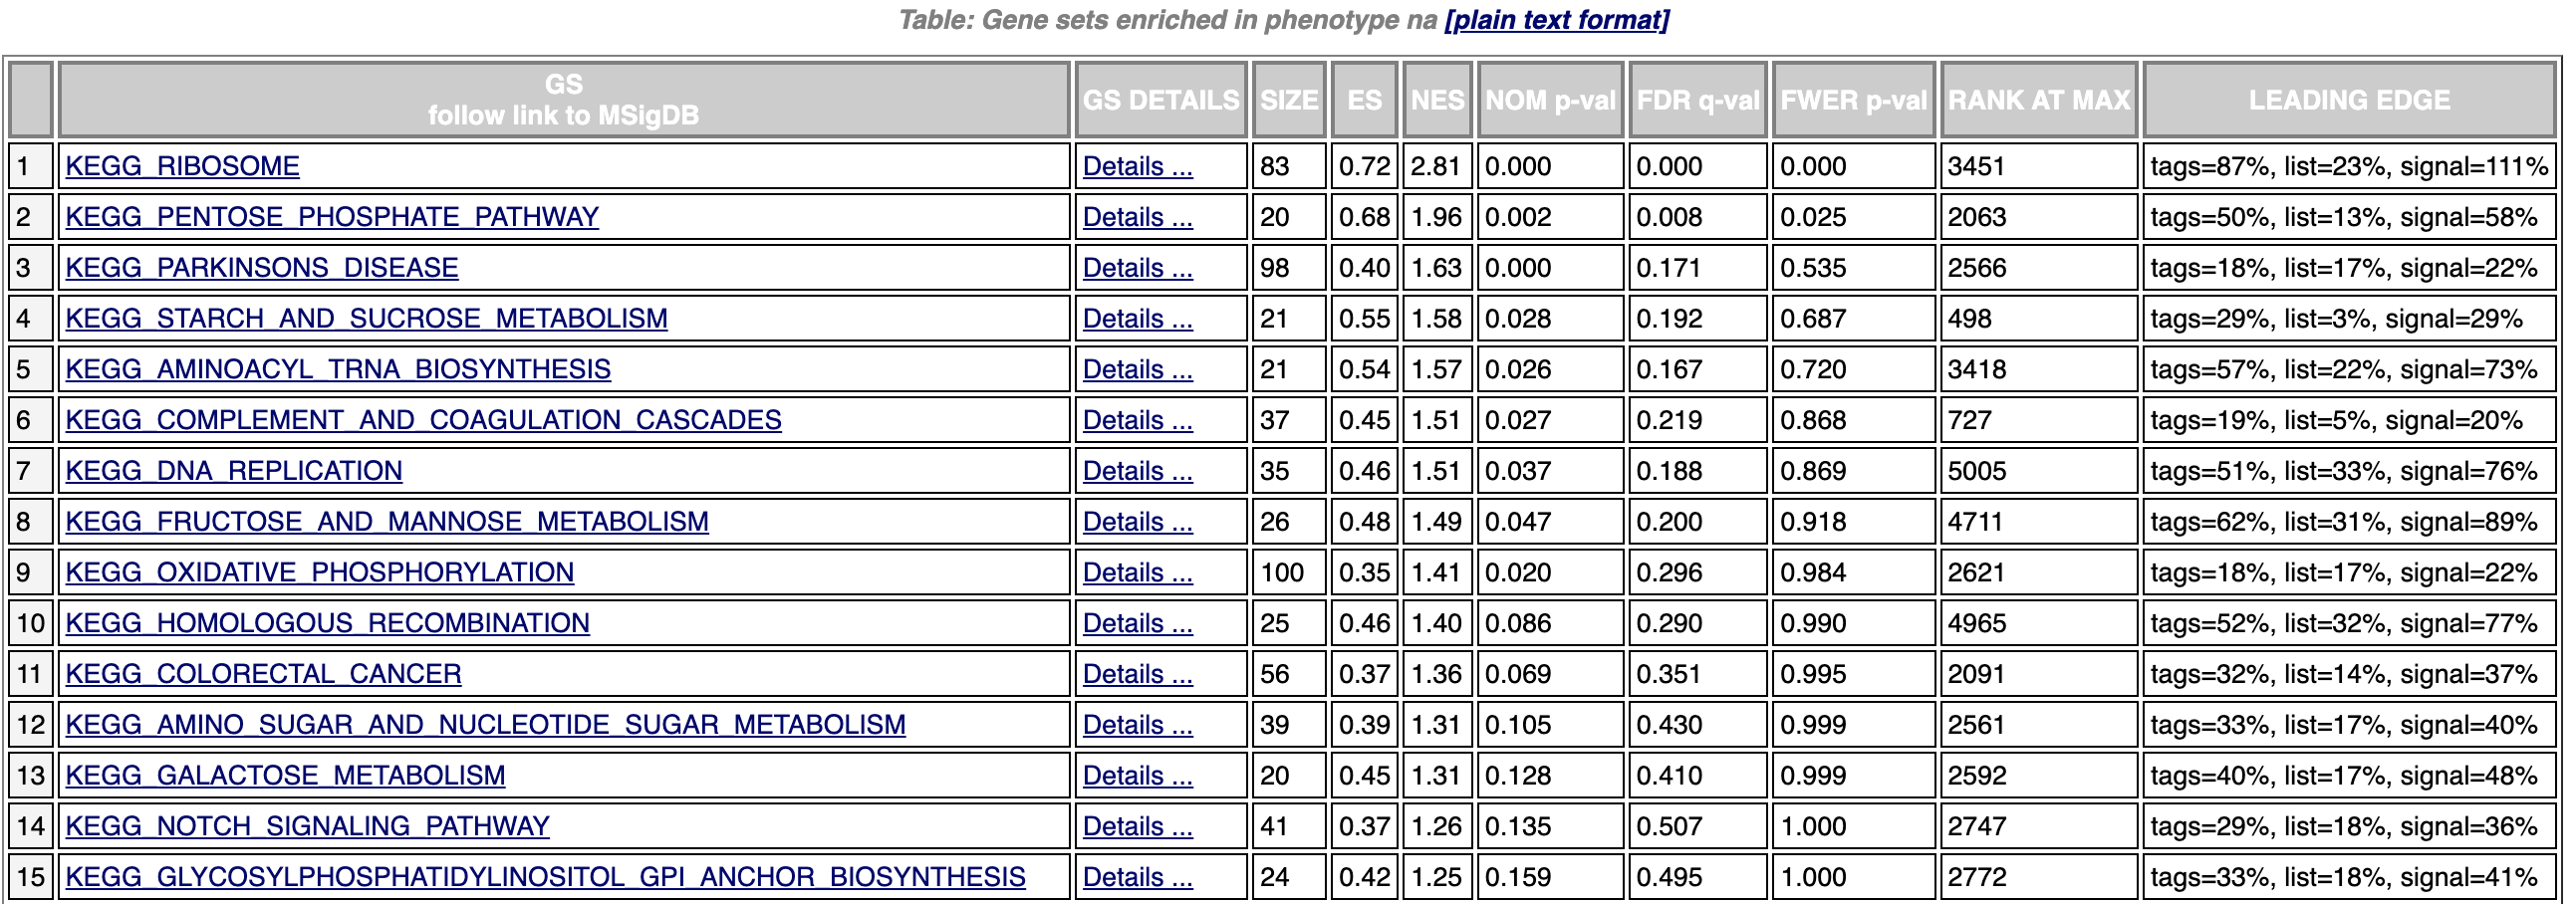

The upregulated genes are related to cell profilation and metabolism, which was expected, however the exact terms do not match the ones found in the paper.

For downregulated:
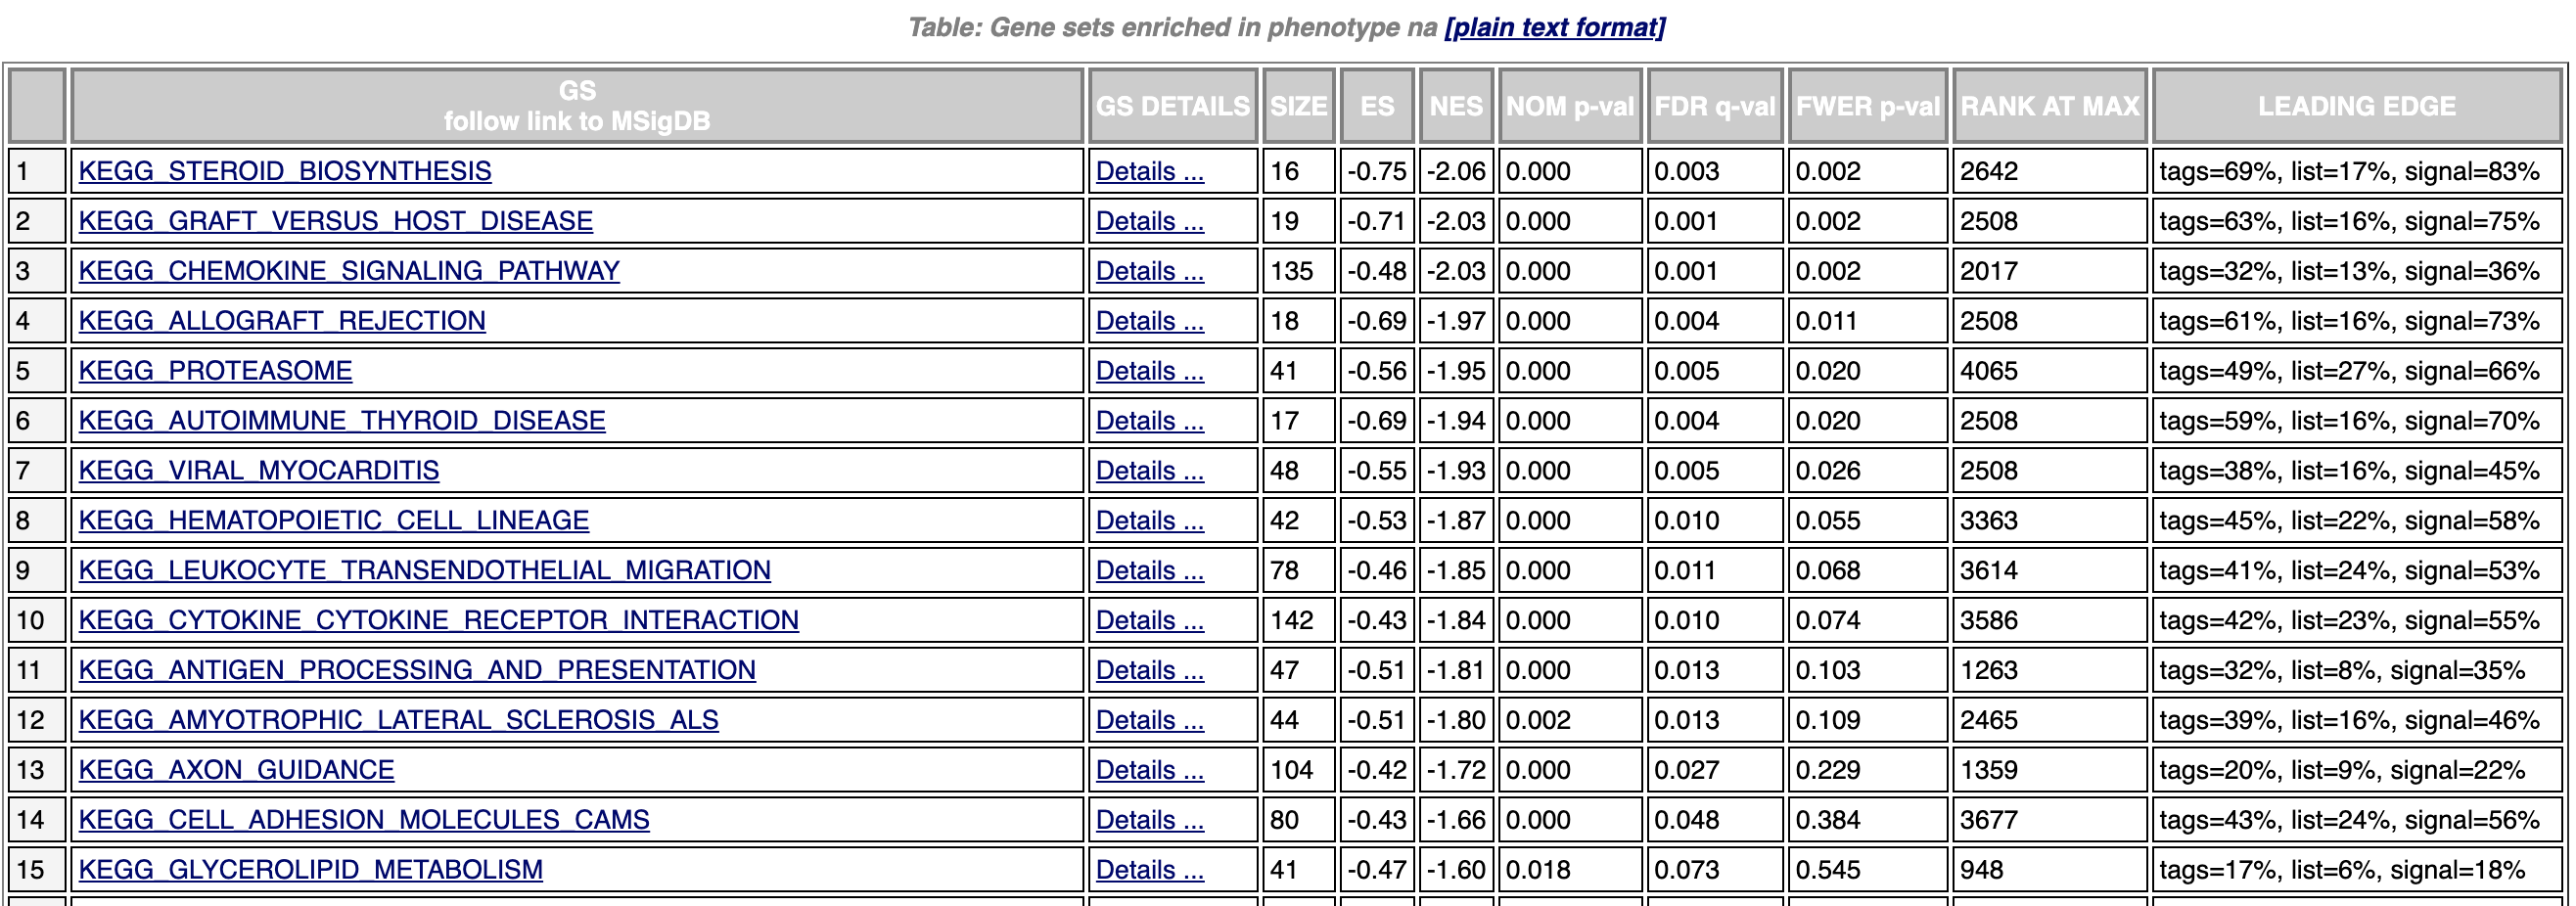

The gene sets show that the downregulated genes are related to the immune system, which was expected and is consistent with the findings in the paper. 

# Motif discovery: upstream TF identification

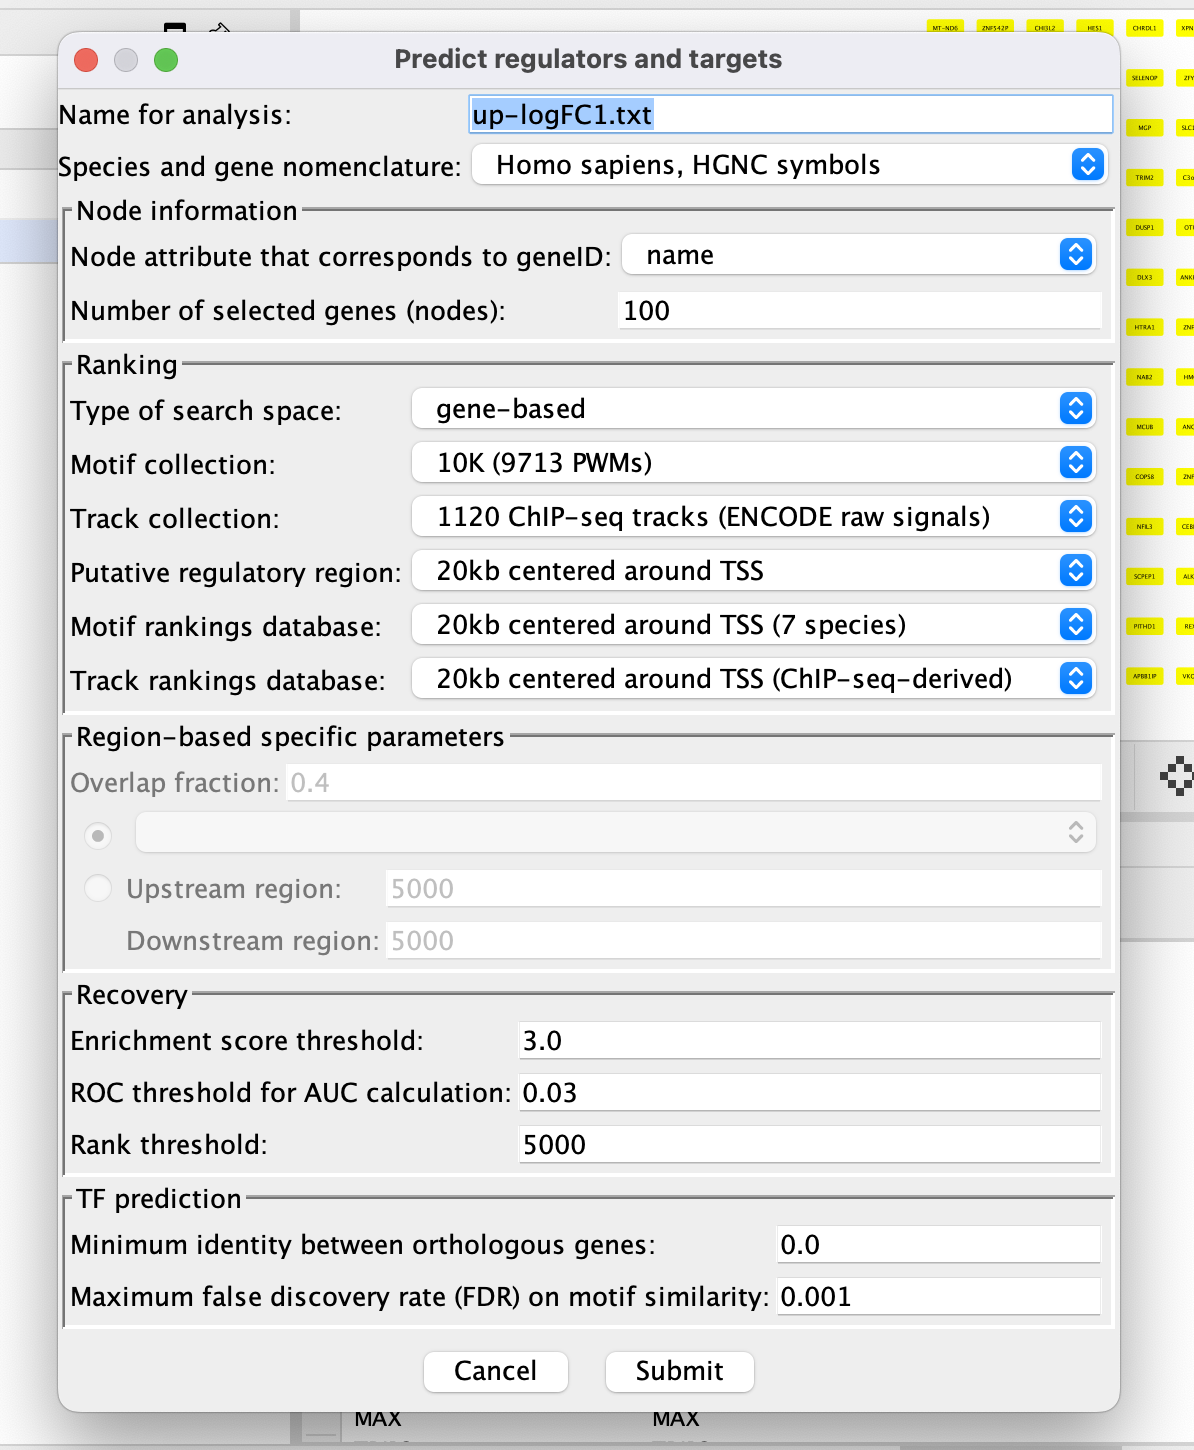

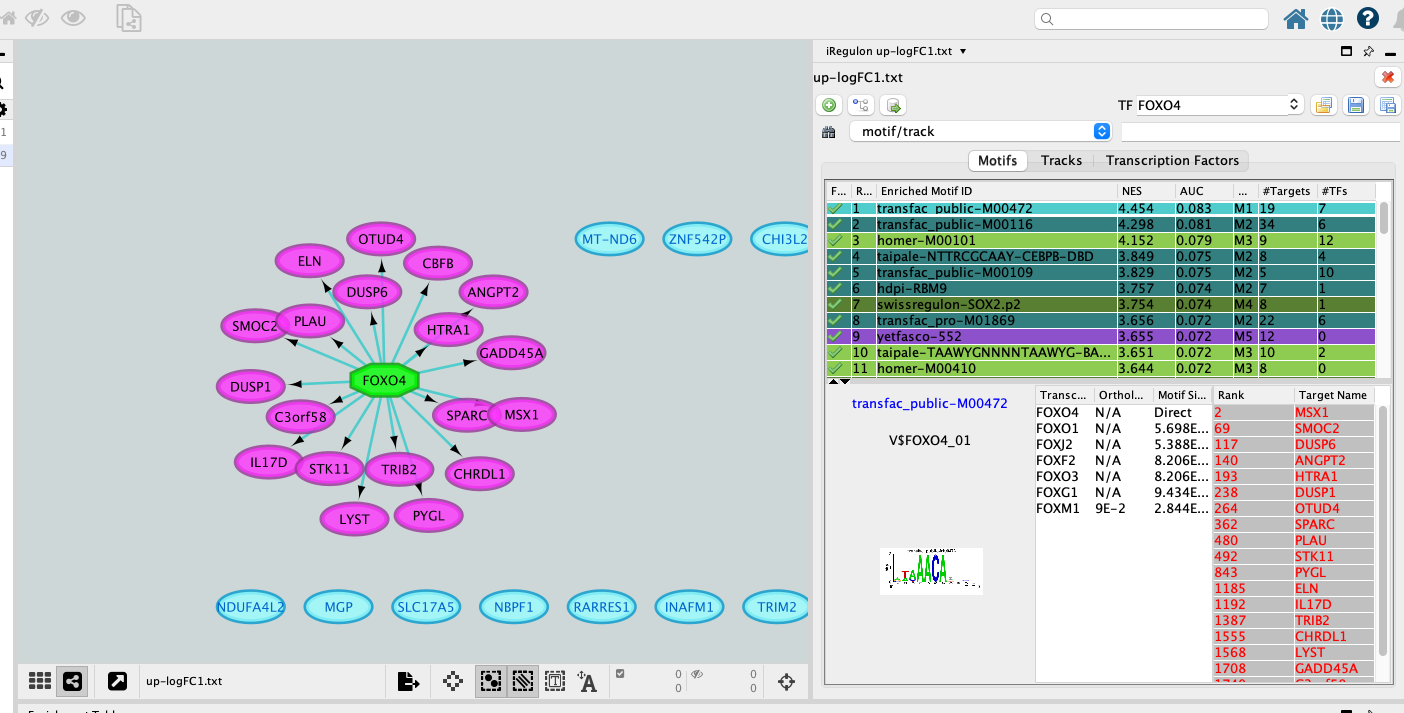

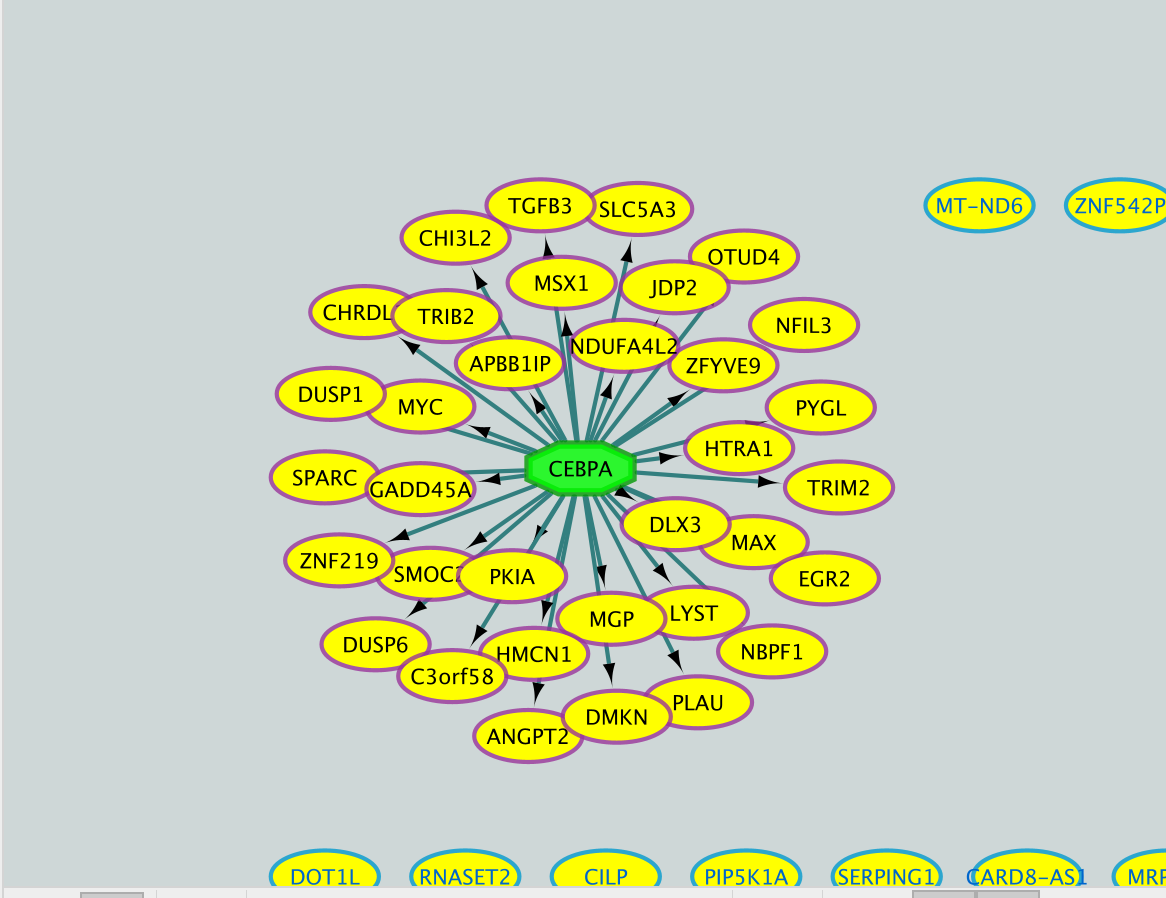

Above are 2 networks of that show the enriched transcription factor in the centre and the target genes associated with it.  

# Conclusion

Some of the results that were published in the paper were not possible to replicate in this analysis. Specifically, no significant upregulation or downregulation was found when looking only at adjusted p values and log2FC, therefore the top and bottom 100 genes were looked at using `humanmine.org` and `gProfiler`.

Using the ranked approach it was possible to identify that pathways related to metabolism and cell profilation were indeed upregulated. The notable downregulated pathways were related to the regulation of the immune system. These findings were consistent with the ones from the paper. Though the exact GO terms did not match, the general pattern was similar. 

Some of the enriched transcription factors include CEBPA and FOXD4, among others. 

Some of the inconsistencies between the paper and the current analysis may be due to the difference in the filtering steps, which were not clearly stated by the authors of the paper. Furthermore, as was already discussed in the first part of the analysis that the levels of duplication in the samples were quite high and there was some evidence of amplification bias and possible adaptor contamination. However, eventhough some of the findings were not completely consistent with those of the paper, it is still possible to conclude that CD73+ cells tend to exhibit upregulation of genes related to the extracellular matrix and downregulation of genes related to the immune response, when compared to cMSCs. 